### Подготовка

In [ ]:
!pip install blocksnet folium matplotlib mapclassify -qq

In [ ]:
from blocksnet import City

Считываем собранную на прошлых занятиях модель в переменную

In [ ]:
Lagov = City.from_pickle('/content/Lagov_model_3.pickle')

In [ ]:
Lagov

In [ ]:
print(Lagov)

CRS : EPSG:32636
Blocks : 104
Service types : 11/77
Buildings : 1868
Services : 86



### Методы работы с моделью

###### Метод оценки разнообразися сервисов в кварталах, основанный на [индексе Шеннона](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%80%D0%B0_%D1%80%D0%B0%D0%B7%D0%BD%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%B8%D1%8F).

In [ ]:
from blocksnet import Diversity

In [ ]:
diversity = Diversity(city_model=Lagov)
result_devirsity = diversity.calculate()

In [ ]:
result_devirsity

,geometry,diversity
id,,
0,"POLYGON ((333323.312 6622195.666, 333492.308 6...",NaN
1,"POLYGON ((332093.546 6621911.376, 331958.920 6...",-0.0
2,"POLYGON ((332689.530 6621987.082, 332689.511 6...",NaN
3,"POLYGON ((332105.166 6620336.872, 331376.389 6...",-0.0
4,"POLYGON ((333135.437 6622119.708, 333086.687 6...",NaN
...,...,...
99,"POLYGON ((332629.584 6622881.096, 332712.260 6...",NaN
100,"POLYGON ((330632.299 6624257.720, 330771.703 6...",NaN
101,"POLYGON ((330771.703 6624034.109, 330632.299 6...",NaN


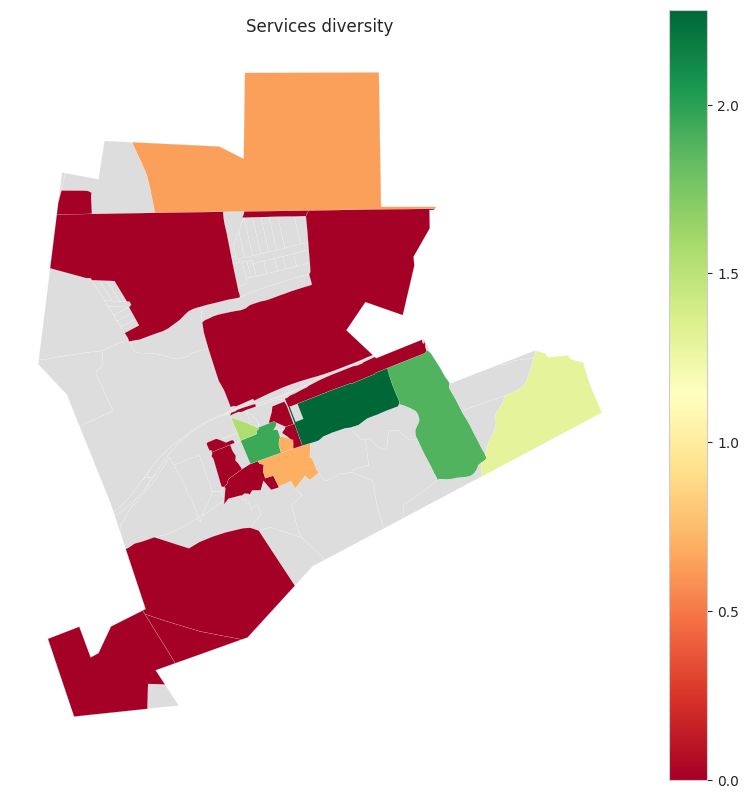

In [ ]:
Diversity.plot(result_devirsity, figsize =(10,10))

###### Методы вычисления центральности кварталов города:

1. ```Centrality``` - оценка центральности по транспортной связности и разнообразию сервисов в кварталах;
2. ```PopulationCentrality``` - оценка центральности по транспортной связности и населению в кварталах.

In [ ]:
from blocksnet import Centrality, PopulationCentrality

In [ ]:
centrality = Centrality(city_model=Lagov)

In [ ]:
result_centrality = centrality.calculate()

In [ ]:
result_centrality

,geometry,connectivity,density,diversity,centrality
id,,,,,
0,"POLYGON ((333323.312 6622195.666, 333492.308 6...",4.304688,NaN,NaN,NaN
1,"POLYGON ((332093.546 6621911.376, 331958.920 6...",2.812500,0.000008,-0.0,0.038001
2,"POLYGON ((332689.530 6621987.082, 332689.511 6...",3.031250,NaN,NaN,NaN
3,"POLYGON ((332105.166 6620336.872, 331376.389 6...",3.167969,0.000005,-0.0,0.052462
4,"POLYGON ((333135.437 6622119.708, 333086.687 6...",3.031250,NaN,NaN,NaN
...,...,...,...,...,...
99,"POLYGON ((332629.584 6622881.096, 332712.260 6...",2.906250,NaN,NaN,NaN
100,"POLYGON ((330632.299 6624257.720, 330771.703 6...",6.703125,NaN,NaN,NaN
101,"POLYGON ((330771.703 6624034.109, 330632.299 6...",8.437500,NaN,NaN,NaN


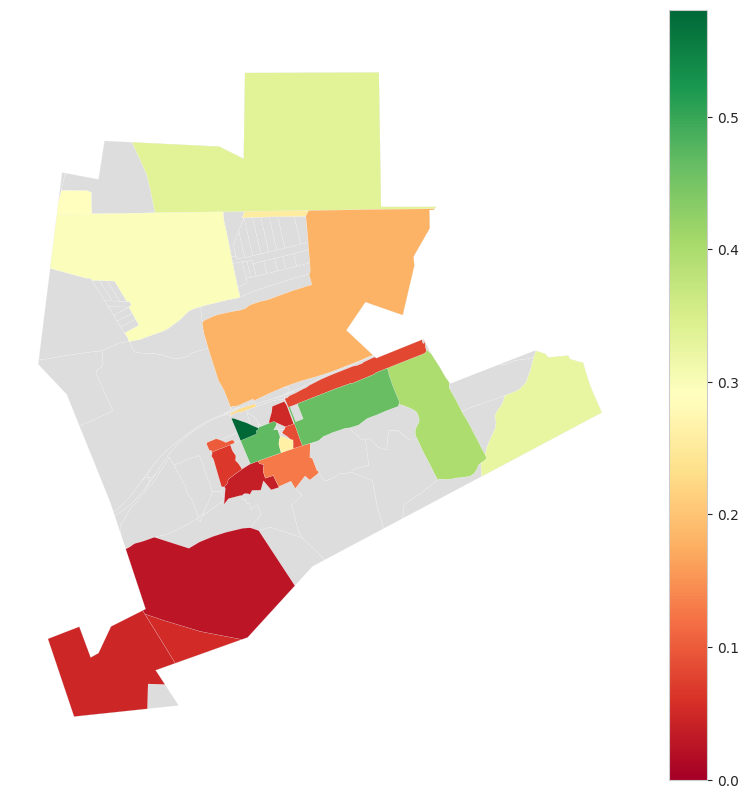

In [ ]:
Centrality.plot(result_centrality, figsize =(10,10))

In [ ]:
centrality_population = PopulationCentrality(city_model=Lagov)

In [ ]:
result_centrlity_population = centrality_population.calculate()

In [ ]:
result_centrlity_population

,geometry,population_centrality
id,,
0,"POLYGON ((333323.312 6622195.666, 333492.308 6...",0.68
1,"POLYGON ((332093.546 6621911.376, 331958.920 6...",5.87
2,"POLYGON ((332689.530 6621987.082, 332689.511 6...",0.85
3,"POLYGON ((332105.166 6620336.872, 331376.389 6...",0.17
4,"POLYGON ((333135.437 6622119.708, 333086.687 6...",3.90
...,...,...
99,"POLYGON ((332629.584 6622881.096, 332712.260 6...",5.52
100,"POLYGON ((330632.299 6624257.720, 330771.703 6...",1.36
101,"POLYGON ((330771.703 6624034.109, 330632.299 6...",1.36


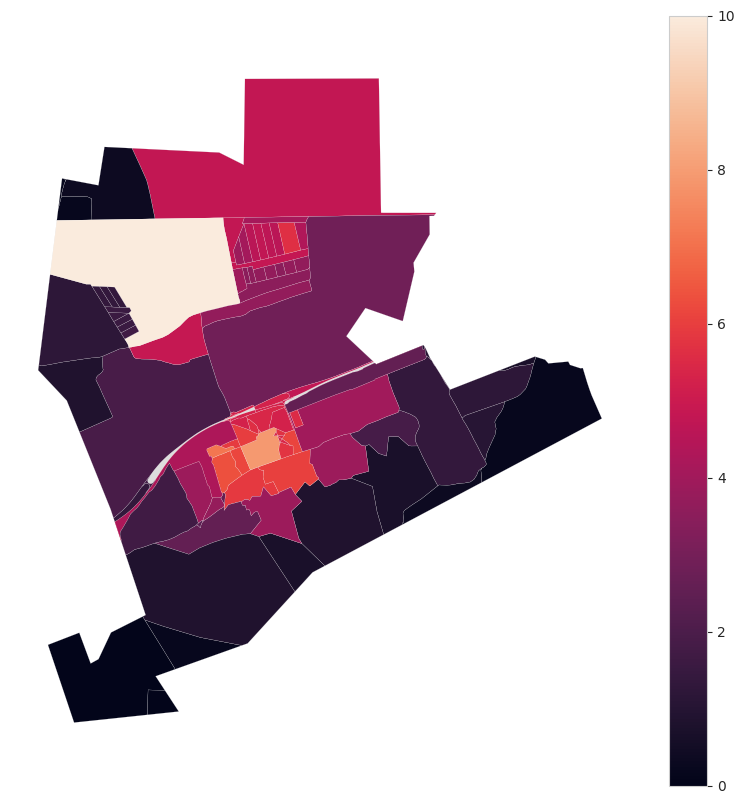

In [ ]:
PopulationCentrality.plot(result_centrlity_population, figsize =(10,10))

###### Метрика оценки кварталов [SpaceMatrix](https://books.open.tudelft.nl/home/catalog/book/38).

In [ ]:
from blocksnet import Spacematrix

In [ ]:
spacematrix = Spacematrix(city_model=Lagov)
result_spacematrix = spacematrix.calculate()

In [ ]:
result_spacematrix

,geometry,l,fsi,mxi,strelka_morphotype,spacematrix_cluster,spacematrix_morphotype
id,,,,,,,
0,"POLYGON ((333323.312 6622195.666, 333492.308 6...",1.442850,0.024715,0.000000,Малоэтажная нежилая застройка,0.0,Малоэтажный низкоплотный нежилой
1,"POLYGON ((332093.546 6621911.376, 331958.920 6...",1.119231,0.115308,0.052157,Малоэтажная модель застройки,7.0,Малоэтажный низкоплотный нежилой
2,"POLYGON ((332689.530 6621987.082, 332689.511 6...",1.039909,0.049902,0.000000,Малоэтажная нежилая застройка,0.0,Малоэтажный низкоплотный нежилой
3,"POLYGON ((332105.166 6620336.872, 331376.389 6...",1.000000,0.002495,0.000000,Малоэтажная нежилая застройка,10.0,Малоэтажный низкоплотный нежилой
4,"POLYGON ((333135.437 6622119.708, 333086.687 6...",1.084417,0.114023,0.000000,Малоэтажная нежилая застройка,0.0,Малоэтажный низкоплотный нежилой
...,...,...,...,...,...,...,...
99,"POLYGON ((332629.584 6622881.096, 332712.260 6...",1.000000,0.025887,0.800000,Индивидуальная жилая застройка,8.0,Малоэтажный низкоплотный жилой
100,"POLYGON ((330632.299 6624257.720, 330771.703 6...",NaN,0.000000,NaN,NaN,NaN,NaN
101,"POLYGON ((330771.703 6624034.109, 330632.299 6...",NaN,0.000000,NaN,NaN,NaN,NaN


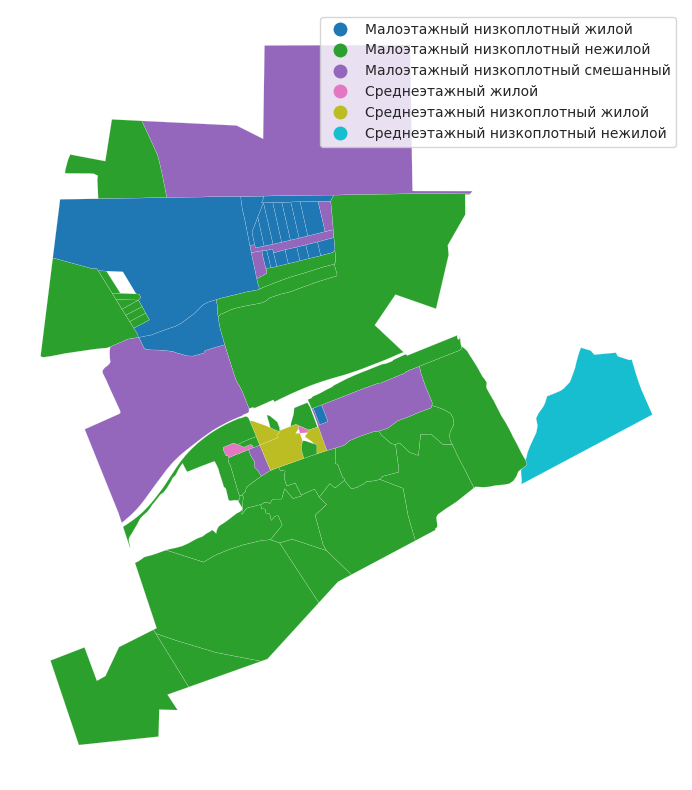

In [ ]:
Spacematrix.plot(result_spacematrix, figsize =(10,10))

###### Метод определения типа землепользования квартала (LandUse) на основе сущетсвующих в модели городских сервисов.

In [ ]:
from blocksnet import LandUsePrediction

In [ ]:
lup = LandUsePrediction(city_model=Lagov)

In [ ]:
result_lup = lup.calculate()

100%|██████████| 104/104 [00:01<00:00, 63.42it/s]


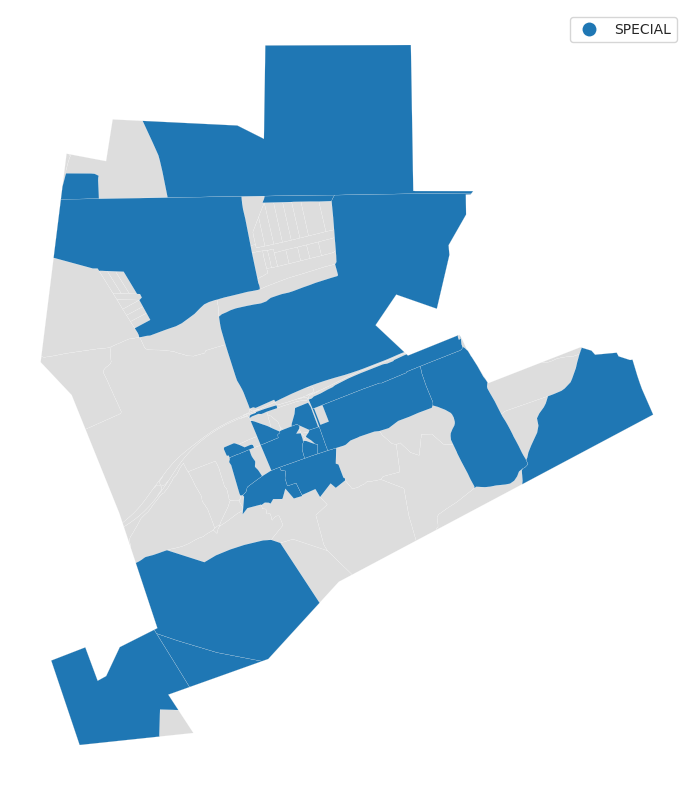

In [ ]:
LandUsePrediction.plot(result_lup)

###### Метод определения [свободной площади](https://www.sciencedirect.com/science/article/pii/S1877050923020306) в квартале.

In [ ]:
from blocksnet import VacantArea

In [ ]:
va = VacantArea(city_model=Lagov)

In [ ]:
gdf_blocks = Lagov.get_blocks_gdf(simplify=True)

In [ ]:
gdf_blocks.explore()

In [ ]:
block = Lagov[id == 68] # выбранный квартал
result_va = va.calculate([block])

Error encountered: No data elements in server response. Check log and query location/tags.
Error encountered: No data elements in server response. Check log and query location/tags.
Error encountered: No data elements in server response. Check log and query location/tags.
Error encountered: No data elements in server response. Check log and query location/tags.
Error encountered: No data elements in server response. Check log and query location/tags.


In [ ]:
result_va.explore()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
